In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [2]:
# Function for picking up points and finding their epipolar lines, on the images
def selectPointsAndfindEpipolarLines(imageL,imageR,F):
    points_L = []
    points_R = []

    mid_point_1 = (imageL.shape[0]//2,imageL.shape[1]//2)
    mid_point_2 = (imageR.shape[0]//2,imageR.shape[1]//2)

    points_L = [[mid_point_1[0],i,1] for i in range(1,imageL.shape[1],10)]
    points_R = [[mid_point_2[0],i,1] for i in range(1,imageR.shape[1],10)]

    lines_L = np.array([ np.dot(F,i) for i in points_R])
    lines_R = np.array([ np.dot(F.transpose(),i) for i in points_L])

    return points_L,points_R,lines_L,lines_R

# Function for drawing Epipolar Lines on images
def drawPointsAndEpipolarLines(pts_1,pts_2,imageL,lines_L,imageR,lines_R):

    output_imageL_points = imageL.copy()
    output_imageR_points = imageR.copy()

    output_imageL_lines = imageL.copy()
    output_imageR_lines = imageR.copy()

    for p in pts_1:
        color = (255,0,0)
        x,y = p[0],p[1]
        output_imageL_points = cv2.circle(output_imageL_points,(x,y)[::-1],5,color,-1)

    for p in pts_2:
        color = (255,0,0)
        x,y = p[0],p[1]
        output_imageR_points = cv2.circle(output_imageR_points,(x,y)[::-1],5,color,-1)

    for r in lines_L:
        color = (0,255,0)
        x0, y0 = map(int, [0, -r[2]/r[1]])
        x1, y1 = map(int, [imageL.shape[1], -(r[2]+r[0]*imageL.shape[1])/r[1]])
        output_imageL_lines = cv2.line(output_imageL_lines, (x0,y0), (x1,y1), color, 2)

    for r in lines_R:
        color = (0,255,0)
        x0, y0 = map(int, [0, -r[2]/r[1]])
        x1, y1 = map(int, [imageR.shape[1], -(r[2]+r[0]*imageR.shape[1])/r[1]])
        output_imageR_lines = cv2.line(output_imageR_lines, (x0,y0), (x1,y1), color, 2)

    fig = plt.figure(figsize=(20,6),facecolor='gray')

    fig.add_subplot(2,2,1)
    plt.imshow(output_imageL_points)
    plt.axis('off')
    plt.title('Points in Image 1')

    fig.add_subplot(2,2,3)
    plt.imshow(output_imageR_points)
    plt.axis('off')
    plt.title('Points in Image 2')

    fig.add_subplot(2,2,4)
    plt.imshow(output_imageL_lines)
    plt.axis('off')
    plt.title('Epipolar lines in Image 1')

    fig.add_subplot(2,2,2)
    plt.imshow(output_imageR_lines)
    plt.axis('off')
    plt.title('Epipolar lines in Image 2')
    
    return plt

From FM.txt

In [3]:
F = np.array([
    [3.34638533e-07,  7.58547151e-06, -2.04147752e-03],
    [-5.83765868e-06,  1.36498636e-06, 2.67566877e-04],
    [1.45892349e-03, -4.37648316e-03,  1.00000000e+00]
])

### Checking Code for Finding Epipolar Lines for points on the other Image

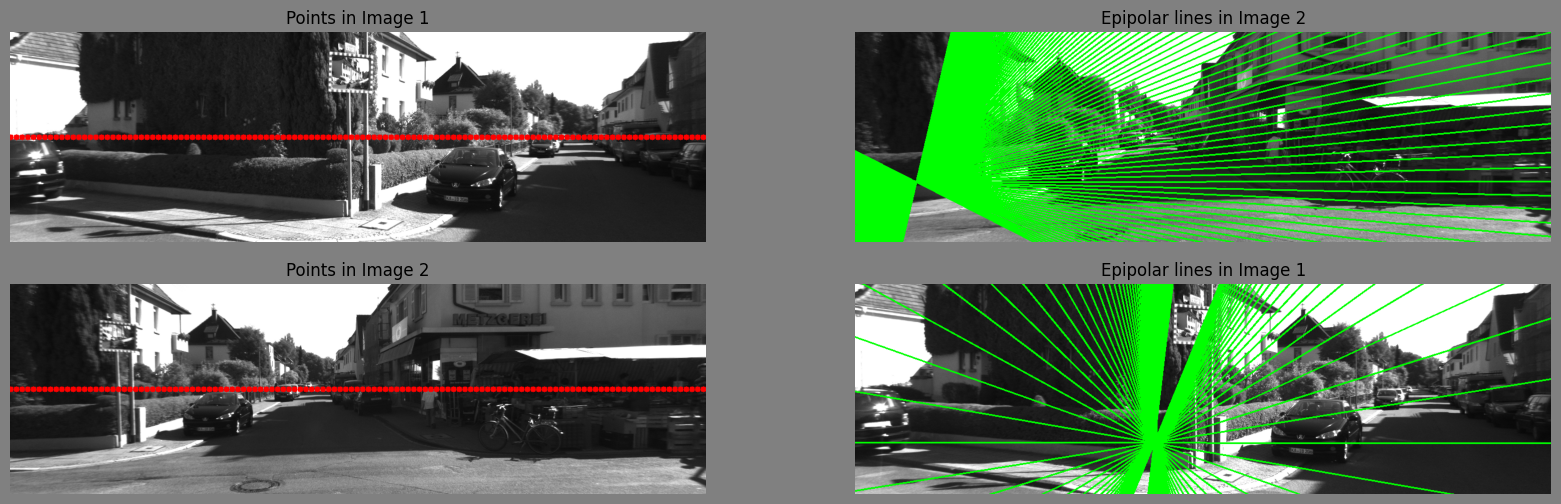

In [20]:
# Load the images
imageL = cv2.imread('./Question 2 and 3 Images/000023.png')
imageR = cv2.imread('./Question 2 and 3 Images/000000.png')

points_L,points_R,lines_L,lines_R = selectPointsAndfindEpipolarLines(
    imageL=imageL,imageR=imageR,
    F=F
)

plt = drawPointsAndEpipolarLines(
    pts_1=points_L,
    pts_2=points_R,
    imageL=imageL,lines_L=lines_L,
    imageR=imageR,lines_R=lines_R
)

plt.show()

### 10 uniformly spaced points and their corresponding points

In [5]:
print(imageL.shape,imageR.shape)

(370, 1226, 3) (370, 1226, 3)


In [6]:
def find_descriptor(image, pixel_coordinates):
    # Convert pixel coordinates to keypoint format
    keypoint = cv2.KeyPoint(x=pixel_coordinates[1], y=pixel_coordinates[0], size=1)

    # Initialize SIFT detector
    sift = cv2.SIFT_create()

    # Compute SIFT descriptors for the keypoint
    keypoints, descriptors = sift.compute(image, [keypoint])

    # Return the descriptor
    return descriptors[0]

Finding Correspondance of Left Image points on same Epipolar Line on Right Image

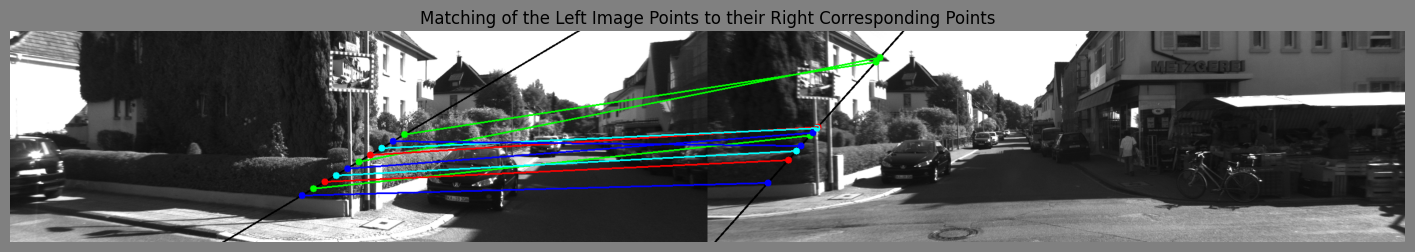

In [21]:
temp1 = imageL.copy()
temp2 = imageR.copy()

colors = [(0,0,255),(0,255,0),(255,0,0),(0,255,255),(0,0,255),(0,255,0),(255,0,0),(0,255,255),(0,0,255),(0,255,0)]

# First Epipolar Line
left_epipolar_line = lines_L[22]

# 10 points on First Epipolar Line
uniformly_spaced_points_L = [(
    -(left_epipolar_line[2]+left_epipolar_line[0]*(imageL.shape[1]//2 + 20*i))/left_epipolar_line[1],
    imageL.shape[1]//2 + 20*i
) for i in range(-5,5)]

# Finding Descriptors of the 10 points
descriptors_L = np.array([ find_descriptor(imageL,(round(i[0]),round(i[1]))) for i in uniformly_spaced_points_L ])


# Plotting First Epipolar Line
x0, y0 = map(int, [0, -left_epipolar_line[2]/left_epipolar_line[1]])
x1, y1 = map(int, [imageL.shape[1], -(left_epipolar_line[2]+left_epipolar_line[0]*imageL.shape[1])/left_epipolar_line[1]])
temp1 = cv2.line(temp1, (x0,y0), (x1,y1), (0,0,0), 2)


# Plotting 10 uniformly spaced points on First Epipolar Line
c = 0
for i in uniformly_spaced_points_L:
    x,y = round(i[0]),round(i[1])
    temp1 = cv2.circle(temp1,(y,x),6,colors[c],-1)
    c+=1


# Computing the Second Epipolar Line
epipolar_line_on_right = [0,0,0]

for i in uniformly_spaced_points_L:
    temp_line = np.dot( F.transpose() , (i[0],i[1],1) )
    
    epipolar_line_on_right[0] += temp_line[0]
    epipolar_line_on_right[1] += temp_line[1]
    epipolar_line_on_right[2] += temp_line[2]

epipolar_line_on_right[0]/=10
epipolar_line_on_right[1]/=10
epipolar_line_on_right[2]/=10

# Plotting the Second Epipolar Line
x2, y2 = map(int, [0, -epipolar_line_on_right[2]/epipolar_line_on_right[1]])
x3, y3 = map(int, [imageR.shape[1], -(epipolar_line_on_right[2]+epipolar_line_on_right[0]*imageR.shape[1])/epipolar_line_on_right[1]])
temp2 = cv2.line(temp2,(x2,y2),(x3,y3),(0,0,0),2)

# Finding the Corresponding Points
x_min = 0
y_min = 0

x_max = imageR.shape[0]
y_max = imageR.shape[1]

corr_points_R = [None for _ in range(10)]
error_in_corr_R = [float('inf') for _ in range(10)]

for xi in range(x_min,x_max):
    yi = round(-(epipolar_line_on_right[1]*xi + epipolar_line_on_right[2])/epipolar_line_on_right[0])
    if y_min <= yi < y_max:
        fdi = np.array(find_descriptor(imageR,(xi,yi)))

        for p in range(10):
            diff = np.sum((fdi-descriptors_L[p])**2)
            
            if error_in_corr_R[p] >  diff:
                error_in_corr_R[p] = diff
                corr_points_R[p] = (xi,yi)

# Plotting the corresponding points
c=0
for i in corr_points_R:
    temp2 = cv2.circle(temp2,i[::-1],6,colors[c],-1)
    c+=1

c=0
result = np.hstack((temp1, temp2))
for (x1, y1), (x2, y2) in zip(uniformly_spaced_points_L, corr_points_R):
    result = cv2.line(result, (round(y1), round(x1)), (temp1.shape[1] + round(y2), round(x2)), colors[c], 2)
    c+=1

# Show the result
fig = plt.figure(figsize=(18,10),facecolor='gray')
plt.axis('off')
plt.title("Matching of the Left Image Points to their Right Corresponding Points")
plt.imshow(result)

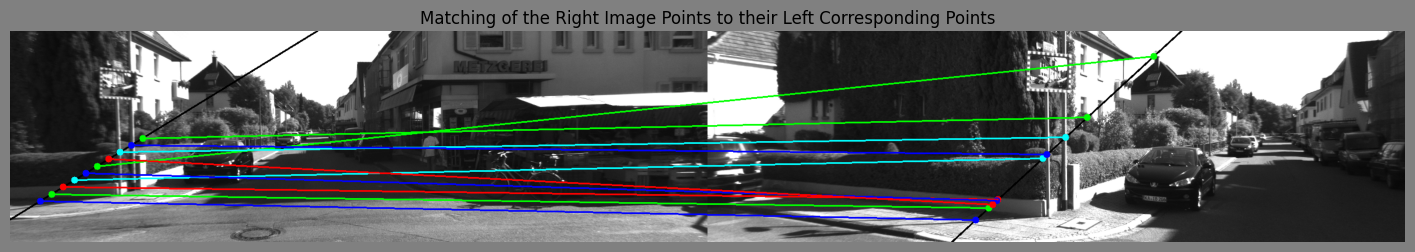

In [71]:
temp1 = imageL.copy()
temp2 = imageR.copy()

colors = [(0,0,255),(0,255,0),(255,0,0),(0,255,255),(0,0,255),(0,255,0),(255,0,0),(0,255,255),(0,0,255),(0,255,0)]

# First Epipolar Line
right_epipolar_line = lines_R[50]

# 10 points on First Epipolar Line
uniformly_spaced_points_R = [(
    -(right_epipolar_line[2]+right_epipolar_line[0]*(imageR.shape[1]//8 + 20*i))/right_epipolar_line[1],
    imageR.shape[1]//8 + 20*i
) for i in range(-5,5)]

# Finding Descriptors of the 10 points
descriptors_R = np.array([ find_descriptor(imageR,(round(i[0]),round(i[1]))) for i in uniformly_spaced_points_R ])


# Plotting First Epipolar Line
x0, y0 = map(int, [0, -right_epipolar_line[2]/right_epipolar_line[1]])
x1, y1 = map(int, [imageR.shape[1], -(right_epipolar_line[2]+right_epipolar_line[0]*imageR.shape[1])/right_epipolar_line[1]])
temp2 = cv2.line(temp2, (x0,y0), (x1,y1), (0,0,0), 2)


# Plotting 10 uniformly spaced points on First Epipolar Line
c = 0
for i in uniformly_spaced_points_R:
    x,y = round(i[0]),round(i[1])
    temp2 = cv2.circle(temp2,(y,x),6,colors[c],-1)
    c+=1


# Computing the Second Epipolar Line
epipolar_line_on_left = [0,0,0]

for i in uniformly_spaced_points_R:
    temp_line = np.dot( F , (i[0],i[1],1) )
    
    epipolar_line_on_left[0] += temp_line[0]
    epipolar_line_on_left[1] += temp_line[1]
    epipolar_line_on_left[2] += temp_line[2]

epipolar_line_on_left[0]/=10
epipolar_line_on_left[1]/=10
epipolar_line_on_left[2]/=10

# Plotting the Second Epipolar Line
x2, y2 = map(int, [0, -epipolar_line_on_left[2]/epipolar_line_on_left[1]])
x3, y3 = map(int, [imageL.shape[1], -(epipolar_line_on_left[2]+epipolar_line_on_left[0]*imageL.shape[1])/epipolar_line_on_left[1]])
temp1 = cv2.line(temp1,(x2,y2),(x3,y3),(0,0,0),2)

# Finding the Corresponding Points
x_min = 0
y_min = 0

x_max = imageR.shape[0]
y_max = imageR.shape[1]

corr_points_L = [None for _ in range(10)]
error_in_corr_L = [float('inf') for _ in range(10)]

for xi in range(x_min,x_max):
    yi = round(-(epipolar_line_on_left[1]*xi + epipolar_line_on_left[2])/epipolar_line_on_left[0])
    if y_min <= yi < y_max:
        fdi = np.array(find_descriptor(imageL,(xi,yi)))

        for p in range(10):
            diff = np.sum((fdi-descriptors_R[p])**2)
            
            if error_in_corr_L[p] >  diff:
                error_in_corr_L[p] = diff
                corr_points_L[p] = (xi,yi)

# Plotting the corresponding points
c=0
for i in corr_points_L:
    temp1 = cv2.circle(temp1,i[::-1],6,colors[c],-1)
    c+=1

c=0
result = np.hstack((temp2,temp1))
for (x1, y1), (x2, y2) in zip(uniformly_spaced_points_R, corr_points_L):
    result = cv2.line(result, (round(y1), round(x1)), (temp1.shape[1] + round(y2), round(x2)), colors[c], 2)
    c+=1

# Show the result
fig = plt.figure(figsize=(18,10),facecolor='gray')
plt.axis('off')
plt.title("Matching of the Right Image Points to their Left Corresponding Points")
plt.imshow(result)